#### Data Analytics Professional (Coursera - Google) - Case Study

# Case Study 1: Analysing Disruption of Media Storage Technology in the Music Industry from 1973 to 1999

Oliver Daubney <br>
**2023-09-01**

### Introduction
The period of 1970-1999 saw a huge number of different data storage technologies <br> 
come and go. This case study will explore the sales of different media storage <br>
technologies in the music industry from 1973 to 1999 with question such as:
- What did music media sales look like between 1973 and 1999?
- Did new media storage technology effect music sales volumes?
- Did new media storage technology impact the sales of legacy media?
- Is it possible to detect new media technologies by their disruptive <br>
effects on related products?

Insights from this analysis may help determine disruptive action within other market <br>
environments and help companies more nimbly address market decisions.

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data - Source and Integrity Information
The data utilised will be key sales volume information for technology from vinyl to cassettes <br>
and cds. The data is volume of sales rather than value of sales to avoid complexity of inflation <br>
but also to help elucidate interesting features about storage capacity and desirability of more <br>
advanced technology.

**Data Source:** *RIAA. Permission to cite or copy these statistics is hereby granted, as long as <br>
proper attribution is given to the Recording Industry Association of America.* The data was <br>
manually accessed from the [U.S. Music Revenue Database](https://www.riaa.com/u-s-sales-database/) on Friday 25 August 2023.

**Data Integrity:** The data has been collected from the source and stored in a local CSV file. <br>
This data is not currently updated (the period of interest is 1973-1999) as such a static local file <br>
is acceptable. The data source logs reported sales information from a wide range of United <br>
States outlets, however, it will not track second-hand purchases or any non-commercial trading. <br>
The original source data is maintained by the U.S. Music Revenue Database and can be used <br> 
for secondary verification against the local file to check local file integrity.

- Reliable: The RIAA is the definitive source of revenue data for the recorded music industry <br>
in the United States.
- Original: The data is collected and consolidated by the RIAA.
- Comprehensive: The RIAA provides the most comprehensive data on U.S. recorded music <br>
revenues and shipments.
- Current: The RIAA maintain the database with current sales information.
- Cited: The RIAA dataset is the industry standard for analysing U.S. recorded music <br>
revenues and shipments.

### Loading Data
The data is stored as a local CSV file (music_sales_volumes_US_1973-1999.csv). The data <br>
is structured with a column for the year and then each subsequent field being a different <br>
technology with the sales volume in millions of units.

In [2]:
data = pd.read_csv('music_sales_volumes_US_1973-1999.csv')
data.head(5)

,year,vinyl_single,lp-ep,eight_track,cassette,cassette_single,other_tapes,cd,cd_single
0,1973,228.0,280.0,91.0,15.0,0.0,2.2,0.0,0.0
1,1974,204.0,276.0,96.7,15.3,0.0,1.9,0.0,0.0
2,1975,164.0,257.0,94.6,16.2,0.0,1.5,0.0,0.0
3,1976,190.0,273.0,106.1,21.8,0.0,0.7,0.0,0.0
4,1977,190.0,344.0,127.3,36.9,0.0,0.0,0.0,0.0


### Data Cleaning and Verification
The data cleaning/verification for this dataset checks three things:
1. That each column contains a full set of non-null values.
2. That the min/max for each column fall within a valid range.
3. That the column data type is appropriate.

In [3]:
stats = ['count', 'min', 'max', 'dtypes']
data.agg(
    {column_name:stats for column_name in list(data.columns.values)}
)

,year,vinyl_single,lp-ep,eight_track,cassette,cassette_single,other_tapes,cd,cd_single
count,27,27,27,27,27,27,27,27,27
min,1973,5.3,1.2,0.0,15.0,0.0,0.0,0.0,0.0
max,1999,228.0,344.0,133.6,450.1,87.4,2.2,938.9,66.7
dtypes,int64,float64,float64,float64,float64,float64,float64,float64,float64


### Basic Analysis - Consolidated Sales Volume
At present the data includes numerous media types. These will be <br>
consolidated into three categories of base technology such as vinyl, <br>
tapes and cds.

In [4]:
data['total_vinyl'] = data['vinyl_single'] + data['lp-ep']
data['total_tapes'] = data['eight_track'] + data['cassette'] + data['cassette_single'] + data['other_tapes']
data['total_cds'] = data['cd'] + data['cd_single']
data[['year', 'total_vinyl', 'total_tapes', 'total_cds']].head()

,year,total_vinyl,total_tapes,total_cds
0,1973,508.0,108.2,0.0
1,1974,480.0,113.9,0.0
2,1975,421.0,112.3,0.0
3,1976,463.0,128.6,0.0
4,1977,534.0,164.2,0.0


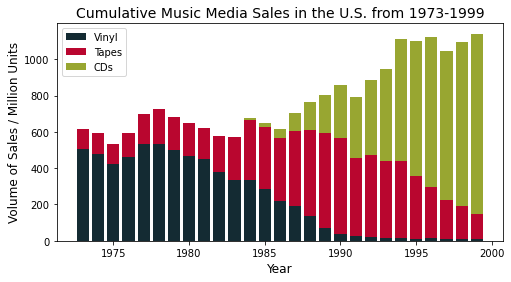

In [5]:
plt.figure(figsize=(8,4))
plt.bar(data['year'], data['total_vinyl'], color='#142b33', label='Vinyl')
plt.bar(data['year'], data['total_tapes'], bottom=data['total_vinyl'], color='#b9062f', label='Tapes')
plt.bar(data['year'], data['total_cds'], bottom=data['total_tapes']+data['total_vinyl'], color='#98a631', label='CDs')

plt.title('Cumulative Music Media Sales in the U.S. from 1973-1999', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Volume of Sales / Million Units', fontsize=12)
plt.legend(loc='upper left')
plt.show()

The overall sale of media in the music industry increased over time. <br>
It is interesting to note that over the course of 20 years the most sold <br>
by volume technology switched three times, vinyl in 1975, tapes in <br>
1985 and cds by 1995. <br>

### Basic Analysis - Separated Media Types
Visualising the individual technologies as line plots can make it easier <br>
to see general trends. The sale of tapes is a good example of a new <br> 
technology driving sales as the sale of records decreases, but then <br>
when CDs enter the market the sale of tapes begins to decline.

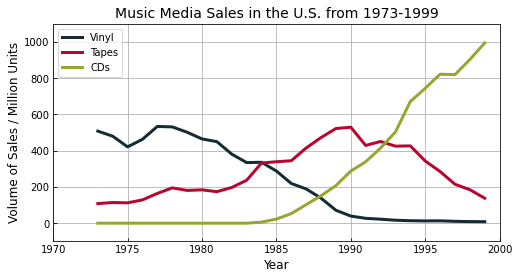

In [6]:
fig, (ax1) = plt.subplots(1, 1, figsize=(8,4))

ax1.plot(data['year'], data['total_vinyl'], '-', label='Vinyl', color='#142b33', lw=3)
ax1.plot(data['year'], data['total_tapes'], '-', label='Tapes', color='#b9062f', lw=3)
ax1.plot(data['year'], data['total_cds'], '-', label='CDs', color='#98a631', lw=3)

ax1.set_title('Music Media Sales in the U.S. from 1973-1999', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Volume of Sales / Million Units', fontsize=12)
ax1.set_ylim([-100, 1100])
ax1.set_xlim([1970, 2000])
ax1.tick_params(direction='in')
ax1.legend(loc='upper left')
ax1.grid()
plt.show()

### Further Analysis - Annual Change in Sale Volumes
In order to plot the annual change in sales volume it is necessary <br>
to create some additional columns and calculate these values. This <br>
involved creating a separate dataframe (**c_data**) to contain the totals <br>
for each media type and the calculated change is sales volume for <br>
each type.

In [7]:
c_data = data[['year', 'total_vinyl', 'total_tapes', 'total_cds']].copy()

c_data['vinyl_annual_change'] = 0.0
c_data['tapes_annual_change'] = 0.0
c_data['cds_annual_change'] = 0.0

for i in range(1, len(c_data)):
    if c_data.iloc[i-1, 1] != 0.0:
        c_data.loc[i, 'vinyl_annual_change'] = (c_data.iloc[i, 1] - c_data.iloc[i-1, 1])/c_data.iloc[i-1, 1]
    if c_data.iloc[i-1, 2] != 0.0:
        c_data.loc[i, 'tapes_annual_change'] = (c_data.iloc[i, 2] - c_data.iloc[i-1, 2])/c_data.iloc[i-1, 2]
    if c_data.iloc[i-1, 3] != 0.0:
        c_data.loc[i, 'cds_annual_change'] = (c_data.iloc[i, 3] - c_data.iloc[i-1, 3])/c_data.iloc[i-1, 3]

c_data.head()

,year,total_vinyl,total_tapes,total_cds,vinyl_annual_change,tapes_annual_change,cds_annual_change
0,1973,508.0,108.2,0.0,0.000000,0.000000,0.0
1,1974,480.0,113.9,0.0,-0.055118,0.052680,0.0
2,1975,421.0,112.3,0.0,-0.122917,-0.014047,0.0
3,1976,463.0,128.6,0.0,0.099762,0.145147,0.0
4,1977,534.0,164.2,0.0,0.153348,0.276827,0.0


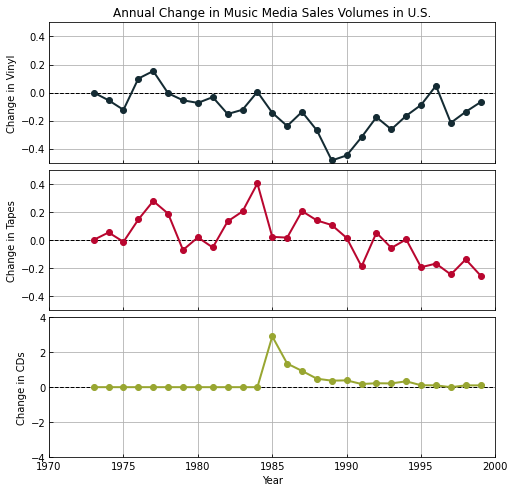

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8), sharex=True)
plt.subplots_adjust(hspace=0.05)

ax1.plot([1970+i for i in range(0, 31)], [0 for i in range(0, 31)], '--', color='black', lw=1)
ax1.plot(c_data['year'], c_data['vinyl_annual_change'], 'o-', color='#142b33', lw=2, ms=6)
ax1.set_title("Annual Change in Music Media Sales Volumes in U.S.")
ax1.set_ylabel('Change in Vinyl')
ax1.set_xlim([1970, 2000])
ax1.set_ylim([-0.5, 0.5])
ax1.tick_params(direction='in')
ax1.grid()

ax2.plot([1970+i for i in range(0, 31)], [0 for i in range(0, 31)], '--', color='black', lw=1)
ax2.plot(c_data['year'], c_data['tapes_annual_change'], 'o-', color='#b9062f', lw=2, ms=6)
ax2.set_ylabel('Change in Tapes')
ax2.set_xlim([1970, 2000])
ax2.set_ylim([-0.5, 0.5])
ax2.tick_params(direction='in')
ax2.grid()

ax3.plot([1970+i for i in range(0, 31)], [0 for i in range(0, 31)], '--', color='black', lw=1)
ax3.plot(c_data['year'], c_data['cds_annual_change'], 'o-', color='#98a631', lw=2, ms=6)
ax3.set_xlabel('Year')
ax3.set_ylabel('Change in CDs')
ax3.set_xlim([1970, 2000])
ax3.set_ylim([-4.0, 4.0])
ax3.tick_params(direction='in')
ax3.grid()

plt.show()

It should be noted that for both Vinyl and Tapes, the initial market <br>
entry is not included in the dataset. This results in the CDs leap from <br>
1984 to 1985 appearing irregular rather than just a normal market uptake. <br>
These plots seem to suggest that once the growth spends more time below <br>
zero than above, in a 3 year moving average, then the technology has <br>
peaked and there is likely to be a new technology taking the market share.

### Further Analysis - Cumulative Change in Sale Volumes
By taking a cumulative plot of the annual change in sale volumes, it can <br>
be considered like a bank of sales growth. The plot will keep rising to a <br>
plateau while the product sales are growing but will have a turning point <br>
at the peak. This peak will indicate peak demand from which another <br>
product may be inducing reduced demand.

In [11]:
c_data['vinyl_cumulative_change'] = 0.0
c_data['tapes_cumulative_change'] = 0.0
c_data['cds_cumulative_change'] = 0.0

for i in range(1, len(c_data)):
    c_data.loc[i, 'vinyl_cumulative_change'] = c_data.iloc[i, 4] + c_data.iloc[i-1, 7]
    c_data.loc[i, 'tapes_cumulative_change'] = c_data.iloc[i, 5] + c_data.iloc[i-1, 8]
    c_data.loc[i, 'cds_cumulative_change'] = c_data.iloc[i, 6] + c_data.iloc[i-1, 9]

c_data[['year', 'vinyl_cumulative_change', 'tapes_cumulative_change', 'cds_cumulative_change']].head()

,year,vinyl_cumulative_change,tapes_cumulative_change,cds_cumulative_change
0,1973,0.000000,0.000000,0.0
1,1974,-0.055118,0.052680,0.0
2,1975,-0.178035,0.038633,0.0
3,1976,-0.078272,0.183780,0.0
4,1977,0.075075,0.460607,0.0


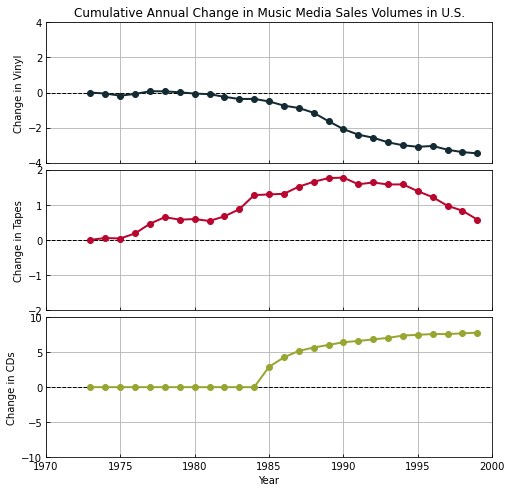

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8), sharex=True)
plt.subplots_adjust(hspace=0.05)

ax1.plot([1970+i for i in range(0, 31)], [0 for i in range(0, 31)], '--', color='black', lw=1)
ax1.plot(c_data['year'], c_data['vinyl_cumulative_change'], 'o-', color='#142b33', lw=2, ms=6)
ax1.set_title("Cumulative Annual Change in Music Media Sales Volumes in U.S.")
ax1.set_ylabel('Change in Vinyl')
ax1.set_xlim([1970, 2000])
ax1.set_ylim([-4.0, 4.0])
ax1.tick_params(direction='in')
ax1.grid()

ax2.plot([1970+i for i in range(0, 31)], [0 for i in range(0, 31)], '--', color='black', lw=1)
ax2.plot(c_data['year'], c_data['tapes_cumulative_change'], 'o-', color='#b9062f', lw=2, ms=6)
ax2.set_ylabel('Change in Tapes')
ax2.set_xlim([1970, 2000])
ax2.set_ylim([-2.0, 2.0])
ax2.tick_params(direction='in')
ax2.grid()

ax3.plot([1970+i for i in range(0, 31)], [0 for i in range(0, 31)], '--', color='black', lw=1)
ax3.plot(c_data['year'], c_data['cds_cumulative_change'], 'o-', color='#98a631', lw=2, ms=6)
ax3.set_xlabel('Year')
ax3.set_ylabel('Change in CDs')
ax3.set_xlim([1970, 2000])
ax3.set_ylim([-10.0, 10.0])
ax3.tick_params(direction='in')
ax3.grid()

plt.show()

Both vinyl and tapes lack the initial growth within the time-frame, as such <br> 
they can decrease below the zero line. The plot profile for tapes shows a <br>
clear growth, peak and fall as CDs begin to grow in popularity. It should <br>
be noted that the peak of cumulative change for tapes occurs in 1990, three <br>
years before total number of CDs sold exceeded that of tapes sold. Note <br>
that the rapid increase in cumulative growth for CDs rapidly begins to <br>
plateau which is a potential indicator of approaching peak growth.

### Observations
1. Overall, the sale of music media by volume increased from 1973 to 1999.
2. New storage media improved sales overall, taking market dominance until <br>
another technology appeared.
3. As new storage media sale volumes increased the previous dominant <br>
technology appeared to decrease (though not instantly but with a lag time).
4. The cumulative annual change in music media sales could be used to <br>
determine when a product has peaked and inform that there may be a market <br>
contender. This pre-empts loss of majority market share as the peak for Tape <br>
sales by volume was 3-4 years before CDs gained the majority market share.

### Conclusions
At present, there is insufficient data presented to directly link the cause <br>
of legacy technology decline in sales with the growth of new technologies. <br>
It should also be noted that this information is for sales data in the United <br>
States and, as such, any conclusions may not generalise to other parts of the world. <br>

1. Customers seem to enjoy embracing new and more data rich technologies with the <br>
introduction of new technologies clearly driving increases in sales volumes. <br>
2. Stakeholders in media technology should observe annual changes in sales volumes <br>
to help give insight about potential disruption.
3. Legacy technology sales volumes decrease with a lag time of a few years following <br>
the release of a new technology.


This initial study has highlighted some interesting trends and postulated a few <br>
thoughts regarding the source of this behaviour. However, further analysis and questions <br>
are required to understand the effect of price, song popularity, proximity to product <br>
and overall availability of the product on sales volumes. This is particularly important <br>
to understand where the technology led to significantly easier manufacturing and thus <br>
a more cost-effective final product.